# 신경망 학습 Recap
목표: **Cost**(함수값)가 최소가 되는 **가중치, 편향**(입력값)을 찾기.
방법: 경사하강법 사용
$$w_{new} = w_{old} - \eta \cdot \nabla C$$

현재 위치($w_{old}$)에서 경사($\nabla C$)를 타고 조금씩($\eta$) 이동하여 더 좋은 위치($w_{new}$)로 간다.

$\nabla C$를 어떻게 계산함?

## 학습 사이클
### Step 1. Forward Propagation

<img src="image/2026-01-14-09-48-54.png"/>

- 방향: 입력층 $\rightarrow$ 은닉층 $\rightarrow$ 출력층  
- 내용: 현재의 가중치와 편향을 사용하여 입력 데이터에 대한 예측값($\hat{y}$)을 계산.  

### Step 2. Loss 계산
- 내용: 예측값($\hat{y}$)과 실제 정답($y$)의 차이를 계산하여 **Cost**를 구함.

#### 인공지능의 겨울 (AI Winter)
1. SLP
   - 입력층과 출력층이 바로 연결된 단순한 구조.
   - 구조가 단순해 미분이 쉽고, 경사하강법을 통한 가중치/편향 업데이트가 쉬움.
   - 한계: XOR 문제와 같은 단순한 비선형 문제조차 풀 수 없음이 증명됨 (Minsky & Papert, 1969).
2. 시도: MLP 도입
   - 아이디어: 퍼셉트론을 여러 층 쌓으면 비선형 문제를 해결할 수 있다
   - 문제: 층이 깊어지면서 출력층에서 발생한 오차를 은닉층의 수많은 가중치들에게 어떻게 배분해야 할지 알 수 없었음.
     - 출력층의 오차를 입력 쪽으로 전달하며 각 층의 미분값($\nabla C$)을 계산할 수학적 방법이 정립되지 않음.
3. 결과: 연구 중단
   - 경사하강법이라는 도구는 있었으나, 이를 실행하기 위한 은닉층의 미분값을 구할 수 없었음.
   - 이 문제를 해결하지 못해 인공지능 연구는 약 20년 동안 암흑기를 맞이함.

##### 해결: 1986년, 제프리 힌튼 등이 **역전파**를 통해 이 문제를 해결


### Step 3. Backpropagation

<img src="image/2026-01-14-09-49-05.png"/>

- 방향: 출력층 $\rightarrow$ 은닉층 $\rightarrow$ 입력층
- 내용: 계산된 오차를 줄이기 위해 **각 가중치가 오차에 얼마나 기여했는지**($\nabla C$)를 역순으로 계산. 

### Step 4. 가중치 업데이트
- Step 3에서 구한 기울기($\nabla C$)를 경사하강법 공식에 대입하여 실제 가중치를 수정.
- 이때 계산에 사용되는 가중치는 항상 업데이트 전 가중치임.
- 업데이트 과정 중 수정된 가중치를 사용하면 안됨. 

---

# 딥러닝 발전 타임라인

## 1. SLP
- 1958년, Frank Rosenblatt: **Perceptron** 발표.
  - 활성화 함수로 **Step function** 사용.
- 1969년, Marvin Minsky: SLP는 XOR 같은 비선형 문제를 표현할 수 없음을 지적.
- MLP를 학습시키는 방법을 몰랐음.

## 2. 수학적 토대 구축
- 1970년, Seppo Linnainmaa: "Reverse mode of automatic differentiation". **Backpropagation**의 수학적 기반 제시.
- 1974년, Paul Werbos: "Beyond regression : new tools for prediction and analysis in the behavioral sciences", 신경망에 오차 역전파를 적용할 수 있음을 제안. 근데 학계 반응은 싸늘.

## 3. MLP와 Backpropagation의 대중화
- 1986년, Geoffrey Hinton et al.: "Learning representations by back-propagating errors"
  - 미분 가능한 활성화 함수 도입: **Step function** 대신 **Sigmoid function**
    - 역전파를 하려면 미분값을 곱하며 뒤로 넘겨줘야 하는데 **Step function**은 불연속 + 나머지 구간에서 기울기가 0 $\rightarrow$ 정보가 전달되지 않음.
    - Sigmoid function: 미분 가능한 매끄러운 비선형 함수 $\rightarrow$ Chain Rule 적용 가능. 
  - MLP로 비선형 문제를 풀 수 있다는 것을 학습으로 증명. 

## 4. Deep Learning의 일시적 한계와 해결
- **Overfitting**: 훈련 데이터에만 너무 잘 맞아서 새로운 데이터를 예측 못함.
  - Regularization
- **Gradient Vanishing**: MLP는 hidden layer를 늘려야 복잡한 문제를 풀 수 있음. 
  - 그런데 Sigmoid function은 미분값이 최대 0.25 $\rightarrow$ 6층 = 0.000244, 10층 = 0.000000953674316 
  - 레이어가 증가할수록 뒤로 전파되는 오차 정보가 사라짐.
  - ReLU([Vinod Nair, Geoffrey E. Hinton; 2010](https://dl.acm.org/doi/10.5555/3104322.3104425)) 등 최대값이 제한되지 않은 활성화 함수 사용
- **가중치 초기화**: 초기값을 대충 주면 학습이 잘 안됨.
  - Xavier Initialization
  - He Initialization
- 깊은 네트워크가 이론적으로 가능 $\rightarrow$ 실용적으로 불가능했던 시기.

## 5. GPU 활용
- 2009년, Rajat Raina, Anand Madhavan, Andrew Ng: "Large-scale deep unsupervised learning using graphics processors"
  - 많은 데이터로 학습한 단순한 모델이 적은 데이터로 학습한 복잡한 모델을 능가할 수 있음을 사례로 제시.
  - GPU를 이용해 기존 알고리즘을 훨씬 빠르고 큰 스케일로 돌리는 방법 제시.
    - 신경망 학습은 대규모 행렬 곱과 element-wise 연산의 반복
<img src="image/2026-01-15-13-55-22.png"/>

      - CPU: 밥 로스 아저씨 1명 vs. GPU: 유치원생 18395919735명
      - 행렬 곱은 각 원소의 계산이 거의 독립적 $\rightarrow$ 밥 로스 아저씨가 혼자서 그림 그리는것보다 유치원생 18395919735명이 동시에 점 하나만 색칠해서 그림 완성하는게 빠름.
      - \+ 메모리 대역폭
    - GTX 280 1대가 CPU 대비 10 ~ 70배 빨랐음.
- 2012년, Alex Krizhevsky, Ilya Sutskever, Geoffrey Hinton: "ImageNet Classification with Deep Convolutional Neural Networks"
  - GPU 병렬 연산 활용, CNN에 대규모 데이터를 학습해서 기존 머신러닝 대비 이미지 분류 정확도를 개선함 (15.3%; 2위 26%)

[[DL] 초기화와 정규화](https://sonstory.tistory.com/71)  
[Vanishing Gradient](https://pozalabs.github.io/Vanishing_Gradient/)  
[Mini Project: GPU Accelerated Matrix Multiplication](https://0mean1sigma.com/xgemm/)

---

# Chain rule 적용이 왜 늦어졌는지?
Credit Assignment Problem: 몇번째 레이어의 가중치가 잘못인지, 그놈만 잘못인지 뭐 그런걸 알 수 없었음.  
Step function: 역전파 불가능.  
컴퓨터 성능: 수치 미분은 계산량 많음, 근데 그거 연산할 하드웨어가 없음.
Local minima에 대한 공포: 
- 비선형 활성화 함수를 쓰면 손실 함수가 non-convex(손실 함수의 모양이 울퉁불퉁)가 되는데 당시에는 gradient descent가 global minimum을 못 찾고 local minima에 갇혀 쓸모없을 것이라는 인식이 강했음. 
- 이후 고차원 신경망에서는 local minima보다 saddle point가 훨씬 많고, 학습 방법을 조금 손보면 이러한 지점을 비교적 쉽게 탈출할 수 있음이 밝혀짐.
  - saddle point: 모든 가중치의 기울기는 0이지만 모든 가중치가 극소점은 아닌 지점.


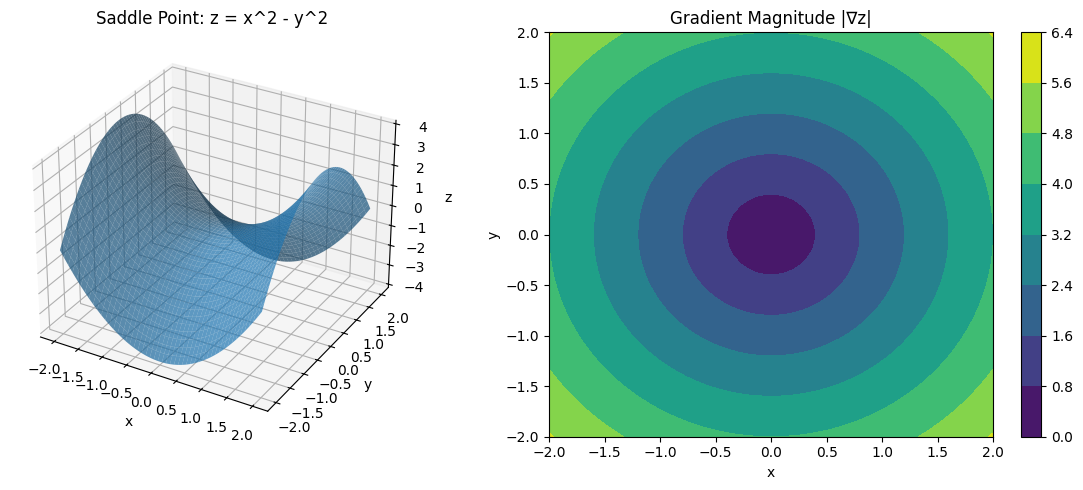

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Grid
x = np.linspace(-2, 2, 50)
y = np.linspace(-2, 2, 50)
X, Y = np.meshgrid(x, y)

# Saddle function
Z = X**2 - Y**2

# Gradient
dZdx = 2 * X
dZdy = -2 * Y

# Gradient magnitude
grad_norm = np.sqrt(dZdx**2 + dZdy**2)

# Plot
fig = plt.figure(figsize=(12, 5))

# (1) Saddle surface
ax1 = fig.add_subplot(1, 2, 1, projection="3d")
ax1.plot_surface(X, Y, Z, alpha=0.7)
ax1.set_title("Saddle Point: z = x^2 - y^2")
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_zlabel("z")

# (2) Gradient magnitude surface
ax2 = fig.add_subplot(1, 2, 2)
c = ax2.contourf(X, Y, grad_norm)
ax2.set_title("Gradient Magnitude |∇z|")
ax2.set_xlabel("x")
ax2.set_ylabel("y")
plt.colorbar(c, ax=ax2)

plt.tight_layout()
plt.show()

# Backpropagation: 그림으로 알아보기

<img src="image/2026-01-15-14-09-37.png"/>

가중치 $r_1, r_2, r_3$ 있는 신경망.

<img src="image/2026-01-15-14-09-52.png"/>

경사하강법으로 가중치 업데이트 하는데 필요한 기울기들.  
신경망이 조금만 커져도 수식이 엄청 복잡해지겠죠?

<img src="image/2026-01-15-14-09-58.png"/>

개별 연산을 함수로 취급해보면?

<img src="image/2026-01-15-14-10-03.png"/>

그리고 여기에 Chain rule을 적용하면?

<img src="image/2026-01-15-14-10-09.png"/>
<img src="image/2026-01-15-14-15-02.png"/>
<img src="image/2026-01-15-14-10-27.png"/>

## 왜 Backpropagation을 쓰는지?
Backpropagation은 계산 그래프 상에서 Chain rule을 적용해 중간 미분 결과를 재사용함으로써 모든 가중치의 gradient를 효율적으로 계산하는 알고리즘.  
출력에서 입력 방향으로 gradient가 전달되니까 **역전파**라고 함.

- 신경망은 많은 연산이 합성된 하나의 큰 함수.
- 각 가중치의 기울기는 Chain rule로 전부 연결됨.
- 순방향으로 미분을 전개하면,
  - 같은 중간 미분을 가중치마다 계속 다시 계산 $\rightarrow$ 계산량 폭발.
- 뒤에서부터 미분하면,
  - 출력 쪽에서 계산한 오차 신호를 이전 레이어들이 재사용할 수 있음.

$\therefore$ **중간 미분값의 재사용**이 Backpropagation의 본질


<img src="image/2026-01-15-14-10-32.png"/>

[[딥러닝] 오차역전파(Backpropagation)를 사용하는 이유](https://velog.io/@nochesita/%EB%94%A5%EB%9F%AC%EB%8B%9D-%EC%98%A4%EC%B0%A8%EC%97%AD%EC%A0%84%ED%8C%8C-Backpropagation)



# Backpropagation: 예시로 알아보기

## 신경망 구조
<img src="image/2026-01-14-13-50-10.png"/>

단순화를 위해 bias는 생략.

$z_n$은 활성화 함수에 들어가는 값  
$h_n$, $o_n$은 활성화 함수를 통과한 결과

## sigmoid 활성화 함수

$$ \sigma(x) = \frac{1}{1+\exp(-x)} \\[12pt]
\dfrac{\partial \sigma(x)}{\partial x} = \sigma(x) \cdot (1-\sigma(x))
$$

<img src="image/2026-01-14-14-10-55.png"/>

## 가중치 초기화
<img src="image/2026-01-14-16-00-43.png"/>

---
## 1. Forward Propagation
<img src="image/2026-01-14-13-50-18.png"/>

### 1. 은닉층
$$ \begin{bmatrix} z_0 \\ z_1 \end{bmatrix} 
= \begin{bmatrix} w_0 & w_2 \\ w_1 & w_3 \end{bmatrix} \begin{bmatrix} x_0 \\ x_1 \end{bmatrix} 
$$

$$ h = \sigma(z)$$

In [3]:
import torch

x = torch.tensor([0.1, 0.4]) # (2,) 1차원 벡터
w0 = torch.tensor([[0.1, 0.6],[0.4, 0.3]])
w1 = torch.tensor([[0.5, 0.7],[0.2, 0.4]])
y = torch.tensor([0.5, 0.9])

print(w0)
z0 = w0 @ x # matrix multiplication
print(f"z0 =",z0)
h = torch.sigmoid(z0)
print(f"h =",h)

tensor([[0.1000, 0.6000],
        [0.4000, 0.3000]])
z0 = tensor([0.2500, 0.1600])
h = tensor([0.5622, 0.5399])


### 2. 출력층
$$ \begin{bmatrix} z_2 \\ z_3 \end{bmatrix} 
= \begin{bmatrix} w_4 & w_6 \\ w_5 & w_7 \end{bmatrix} \begin{bmatrix} h_0 \\ h_1 \end{bmatrix} 
$$

$$ o = \sigma(z) = y_\mathrm{pred}$$

In [4]:
z1 = w1 @ h
print(f"z1 =",z1)
o = torch.sigmoid(z1)
print(f"y_pred =",o)

z1 = tensor([0.6590, 0.3284])
y_pred = tensor([0.6590, 0.5814])


## 2. Loss, Cost 계산
### MSE (Mean Squared Error) 
$$ \mathrm{Cost} = \frac{1}{n} \times \sum (y - y_\mathrm{pred})^2 $$

n은 데이터 개수.  

In [5]:
import torch.nn.functional as F

error = o - y
print("오차 =", error)

squared_error = error ** 2
print("오차 제곱 =", squared_error)

mse_loss = squared_error.mean()
print("MSE Loss =", mse_loss)

# or

loss = F.mse_loss(o, y)
print("MSE Loss =", loss)

오차 = tensor([ 0.1590, -0.3186])
오차 제곱 = tensor([0.0253, 0.1015])
MSE Loss = tensor(0.0634)
MSE Loss = tensor(0.0634)


## 3. Backpropagation
### 1. 출력층 업데이트
$\dfrac{\partial C}{\partial w_4}$를 계산하기 위해 Chain rule을 적용해보면,  
$$\frac{\partial C}{\partial w_4} 
= \frac{\partial C}{\partial o_0} \times \frac{\partial o_0}{\partial z_2} \times \frac{\partial z_2}{\partial w_4}.$$

첫번째 항 $\dfrac{\partial C}{\partial o_0}$는,
$$ C = E_0 + E_1 = \frac{1}{2} (y_0 - o_0)^2 + \frac{1}{2} (y_1 - o_1)^2, \\[12pt]
\frac{\partial C}{\partial o_0} 
= \frac{\partial E_0}{\partial o_0} + \frac{\partial E_1}{\partial o_0}
= 2 \times \frac{1}{2} (y_0 - o_0)^{2-1} \times (-1) + 0 
= - (y_0 - o_0) = 0.1590. $$

다음으로 두번째 항 $\dfrac{\partial o_0}{\partial z_2} = \dfrac{\partial \sigma(z_2)}{\partial z_2}$을 구해야 함.

sigmoid 함수의 편미분은 $\dfrac{\partial \sigma(x)}{\partial x} = \sigma(x) \cdot (1-\sigma(x))$ 이므로,
$$\dfrac{\partial o_0}{\partial z_2} = \sigma(z_2) \cdot (1-\sigma(z_2))
= 0.6590 (1-0.6590) = 0.2247.$$

$z_2 = w_4 h_0 + w_6 h_1$이므로 마지막 항 $\dfrac{\partial z_2}{\partial w_4}$은 $h_0$과 같음.
$$\dfrac{\partial z_2}{\partial w_4} = h_0 = 0.5622.$$

따라서 
$$\frac{\partial C}{\partial w_4} 
= \frac{\partial C}{\partial o_0} \times \frac{\partial o_0}{\partial z_2} \times \frac{\partial z_2}{\partial w_4}
= 0.1590 \times 0.2247 \times 0.5622 = 0.0201.$$

비슷한 방법으로
$$\dfrac{\partial C}{\partial w_5} = -0.0436,\\[12pt]
\dfrac{\partial C}{\partial w_6}= 0.0193,\\[12pt]
\dfrac{\partial C}{\partial w_7}= -0.0419.$$
을 계산할 수 있음.

학습률(learning rate, $\alpha$)로 가중치를 업데이트하면,
$$
w_4^\ast = w_4 - \alpha \cdot \dfrac{\partial C}{\partial w_4},\\[12pt]
w_5^\ast = w_5 - \alpha \cdot \dfrac{\partial C}{\partial w_5},\\[12pt]
\dots .$$

### 2. 은닉층 업데이트
$w_0$을 업데이트 하려면 아래 값이 필요함.
$$\frac{\partial C}{\partial w_0} 
= \frac{\partial C}{\partial h_0} \times \frac{\partial h_0}{\partial z_0} \times \frac{\partial z_0}{\partial w_0}.$$

$\dfrac{\partial C}{\partial h_0}$만 분리해서 보기
$$
\frac{\partial C}{\partial h_0}
= \frac{\partial E_0}{\partial h_0} + \frac{\partial E_1}{\partial h_0}, \\[12pt]
\dfrac{\partial E_0}{\partial h_0}
= \frac{\partial E_0}{\partial z_2} \cdot \frac{\partial z_2}{\partial h_0}
= \frac{\partial E_0}{\partial o_0} \cdot \frac{\partial o_0}{\partial z_2} \cdot \frac{\partial z_2}{\partial h_0}.
$$

$\dfrac{\partial E_0}{\partial o_0} = 0.1590, \dfrac{\partial o_0}{\partial z_2}= 0.2247$는 앞에서 구했고, $z_2=w_4 h_0 + w_6 h_1$이므로, $\dfrac{\partial z_2}{\partial h_0} = w_4 = 0.5$임.

$$\dfrac{\partial E_0}{\partial h_0}
= \frac{\partial E_0}{\partial o_0} \cdot \frac{\partial o_0}{\partial z_2} \cdot \frac{\partial z_2}{\partial h_0} 
= 0.1590 \cdot 0.2247 \cdot 0.5 = 0.01786.
$$

비슷한 방법으로 
$$\dfrac{\partial E_1}{\partial h_0}
= \frac{\partial E_1}{\partial o_1} \cdot \frac{\partial o_1}{\partial z_3} \cdot \frac{\partial z_3}{\partial h_0} 
= -0.3186 \cdot 0.2434 \cdot 0.2 = -0.01551.
$$

따라서,
$$
\frac{\partial C}{\partial h_0} = \frac{\partial E_0}{\partial h_0} + \frac{\partial E_1}{\partial h_0} = 0.01786 -0.01551= -0.002359.
$$

나머지 항들,  
$$
\dfrac{\partial h_0}{\partial z_0} = \sigma(z_0) \cdot (1-\sigma(z_0)) = 0.2461,\\[12pt]
\dfrac{\partial z_0}{\partial w_0} = x_0 = 0.1.
$$
로 계산되므로,

$$
\frac{\partial C}{\partial w_0}
= \frac{\partial C}{\partial h_0} \times \frac{\partial h_0}{\partial z_0} \times \frac{\partial z_0}{\partial w_0}
= -0.002359 \times 0.2461 \times 0.1 = -0.00005805499 = -5.8 \times 10^{-5}
$$

학습률(learning rate, $\alpha$)로 가중치를 업데이트하면,
$$
w_0^\ast = w_0 - \alpha \cdot \dfrac{\partial C}{\partial w_0},\\[12pt]
w_1^\ast = w_1 - \alpha \cdot \dfrac{\partial C}{\partial w_1},\\[12pt]
\dots .$$

In [12]:
import torch

# 1. 데이터 정의
x = torch.tensor([0.1, 0.4])
y = torch.tensor([0.5, 0.9])

# 2. 가중치 초기화 (requires_grad=True: 이 변수는 미분할거니까 추적할 것)
w0 = torch.tensor([[0.1, 0.6], [0.4, 0.3]], requires_grad=True)
w1 = torch.tensor([[0.5, 0.7], [0.2, 0.4]], requires_grad=True)

learning_rate = torch.tensor(0.1)

print(f"학습 전 예측값")
with torch.no_grad():
    z0 = w0 @ x
    h = torch.sigmoid(z0)
    z1 = w1 @ h
    o = torch.sigmoid(z1)
    print(f"Initial Prediction: {o}")

# Step 1: 순전파
z0 = w0 @ x
h = torch.sigmoid(z0)
z1 = w1 @ h
o = torch.sigmoid(z1)

# Step 2: Loss 계산
loss = ((o - y) ** 2).mean() # MSE
print(f"\nLoss: {loss.item()}")

loss.backward()

print(f"\n계산된 w1의 기울기(Gradient):\n{w1.grad}")
print(f"\n계산된 w0의 기울기(Gradient):\n{w0.grad}")

# Step 4: 경사하강법 (Update)
# w = w - lr * gradient
with torch.no_grad(): # 업데이트 할 때는 미분 계산을 멈춤.
    w0 -= learning_rate * w0.grad
    w1 -= learning_rate * w1.grad

    # (중요) 다음 학습을 위해 기울기 초기화
    w0.grad.zero_()
    w1.grad.zero_()

print("\n업데이트된 가중치 w1")
print(w1)

학습 전 예측값
Initial Prediction: tensor([0.6590, 0.5814])

Loss: 0.06340962648391724

계산된 w1의 기울기(Gradient):
tensor([[ 0.0201,  0.0193],
        [-0.0436, -0.0419]])

계산된 w0의 기울기(Gradient):
tensor([[ 5.8070e-05,  2.3228e-04],
        [-1.4911e-04, -5.9645e-04]])

업데이트된 가중치 w1
tensor([[0.4980, 0.6981],
        [0.2044, 0.4042]], requires_grad=True)


# 실제로 학습을 시켜보면

목표 정답: [0.5, 0.8999999761581421]
초기 예측: [0.6590421795845032, 0.5813703536987305]
------------------------------------------------------------------------
Epoch [50/500] | Loss: 0.014434 | 예측값: [[0.5684 0.7445]]
Epoch [100/500] | Loss: 0.004925 | 예측값: [[0.5262 0.8043]]
Epoch [150/500] | Loss: 0.002248 | 예측값: [[0.5097 0.8337]]
Epoch [200/500] | Loss: 0.001207 | 예측값: [[0.5035 0.851 ]]
Epoch [250/500] | Loss: 0.000710 | 예측값: [[0.5013 0.8623]]
Epoch [300/500] | Loss: 0.000441 | 예측값: [[0.5005 0.8703]]
Epoch [350/500] | Loss: 0.000285 | 예측값: [[0.5002 0.8761]]
Epoch [400/500] | Loss: 0.000189 | 예측값: [[0.5001 0.8806]]
Epoch [450/500] | Loss: 0.000128 | 예측값: [[0.5   0.884]]
Epoch [500/500] | Loss: 0.000088 | 예측값: [[0.5    0.8868]]
------------------------------------------------------------------------
최종 예측: [0.5000097751617432, 0.8868021965026855]


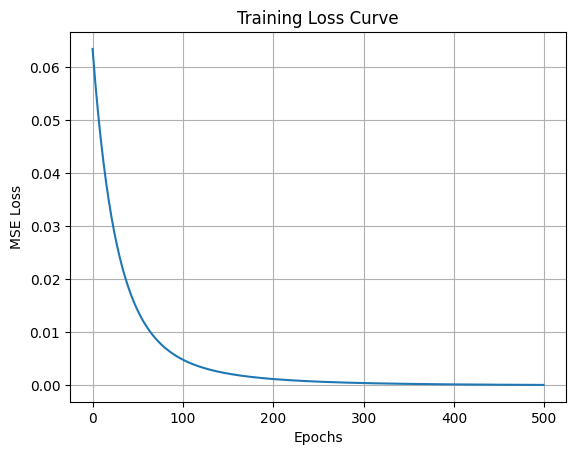

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

x = torch.tensor([[0.1, 0.4]])
y = torch.tensor([[0.5, 0.9]]) # 목표 정답

class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet, self).__init__()
        
        self.fc1 = nn.Linear(2, 2, bias=False)
        self.fc2 = nn.Linear(2, 2, bias=False)
        self.sigmoid = nn.Sigmoid()
        
        with torch.no_grad():
            self.fc1.weight.copy_(torch.tensor([[0.1, 0.6], [0.4, 0.3]])) 
            self.fc2.weight.copy_(torch.tensor([[0.5, 0.7], [0.2, 0.4]]))

    def forward(self, x):
        x = self.sigmoid(self.fc1(x))
        x = self.sigmoid(self.fc2(x))
        return x

model = SimpleNet()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.5)

# 학습 시작
epochs = 500
loss_history = [] 

print(f"목표 정답: {y.tolist()[0]}")
print(f"초기 예측: {model(x).detach().tolist()[0]}")
print("-" * 72)

for epoch in range(epochs):
    # 1. 초기화
    optimizer.zero_grad()
    
    # 2. 순전파
    outputs = model(x)
    
    # 3. Loss 계산
    loss = criterion(outputs, y)
    
    # 4. 역전파 & 5. 업데이트
    loss.backward()
    optimizer.step()
    
    # 기록 저장
    loss_history.append(loss.item())
    
    if (epoch + 1) % 50 == 0:
        print(f"Epoch [{epoch+1}/{epochs}] | Loss: {loss.item():.6f} | 예측값: {outputs.detach().numpy().round(4)}")

print("-" * 72)
print(f"최종 예측: {model(x).detach().tolist()[0]}")

# --- 학습 곡선 시각화 ---
plt.plot(loss_history)
plt.title('Training Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.grid(True)
plt.show()